# Lab Assignment Two: Exploring Image Data 

***Logan Choi and Kawther Aldosarei***

## **1. Business Understanding**

### Dataset Overview
The **Stanford Dogs Dataset** is a meticulously curated collection that comprises a total of **20,580 images** representing **120 distinct breeds** of dogs. These images have been sourced from a wide range of online platforms and repositories, ensuring a diverse and comprehensive representation of each breed. Each image is not only visually informative but is also accompanied by a precise label indicating the corresponding breed of the dog. This structured labeling transforms the dataset into an ideal resource for tackling the well-defined challenge of image classification within the field of computer vision.

### Purpose of the Dataset
This dataset serves a pivotal role in advancing research and development in computer vision, particularly for the training and evaluation of image classification algorithms. By offering a large-scale, varied set of dog images, the Stanford Dogs Dataset enables researchers and practitioners to construct and refine models capable of accurately discerning and classifying different dog breeds. The implications of this work extend beyond academic interest, influencing practical applications such as pet identification, animal welfare initiatives, and commercial services like pet insurance and breeding operations.

### Prediction Task
The core prediction task associated with the Stanford Dogs Dataset revolves around the classification of dog images into their respective breeds. This involves deploying machine learning models that learn to recognize and differentiate the unique visual features and characteristics inherent to each breed, based on the provided images. The complexity of this task arises from the need to account for variations in image quality, lighting, background, and the diverse physical traits of the dog breeds depicted.

### Business Value
The potential applications of an effective classification model based on this dataset are extensive and impactful:

- **Veterinarians and Animal Shelters**: These professionals could employ the classification model to accurately identify dog breeds, enabling better health and care recommendations tailored to the specific needs and predispositions of different breeds. For instance, certain breeds may be more susceptible to particular health issues, and knowledge of the breed could inform preventive care strategies.
  
- **Pet Insurance Companies**: Insurance providers could harness the model for breed identification, allowing them to tailor their insurance policies to address breed-specific health risks. This could lead to more personalized coverage options for pet owners, ultimately enhancing customer satisfaction and loyalty.
  
- **Dog Breeders**: Breeders could utilize the insights generated by the model to evaluate their breeding practices, ensuring that they adhere to breed standards and health guidelines. The ability to accurately identify and promote breed characteristics could enhance their reputation and success in the market.
  
- **Researchers and Developers**: In the realm of artificial intelligence, this dataset represents a valuable platform for testing and enhancing new algorithms, pushing the boundaries of classification accuracy. The insights gained could contribute to advancements in machine learning techniques and applications beyond dog breed classification.

### Importance of Data
The Stanford Dogs Dataset holds significant importance in the context of deep learning and image recognition. Given that different dog breeds exhibit varying physical characteristics and behaviors, the ability to accurately classify these images can yield insights that significantly improve the quality of life for both pets and their owners. Moreover, for the prediction algorithm to be deemed effective and useful in real-world applications, it should achieve an accuracy threshold of at least **85%**. This level of performance is essential to ensure reliable breed identification and to bolster trust among stakeholders who rely on the model for accurate information.

### Expected Outcome
The overarching goal of this analysis is to develop a robust image classification model capable of accurately predicting dog breeds from the images contained within the Stanford Dogs Dataset. Specifically, we aim to accomplish the following objectives:

- **Achieve High Classification Accuracy**: Our target is to attain a minimum classification accuracy of **85%** on a held-out test set, demonstrating the model's reliability and effectiveness.
  
- **Generate Meaningful Visualizations**: We will create a series of visualizations that not only highlight the model’s performance metrics but also elucidate the underlying characteristics of the dataset, providing insights into breed distinctions and model strengths.
  
- **Identify Key Features**: Employing techniques such as Principal Component Analysis (PCA) and feature extraction, we will investigate which aspects of the images are most informative for distinguishing between different dog breeds. Understanding these features will aid in refining our model and improving its classification capabilities.
  
- **Provide Actionable Insights**: Deliver a comprehensive report that includes recommendations for stakeholders based on the model's performance and analysis, offering guidance on how to leverage the insights gained from the classification process.

========================================================================


**Dataset**: Adult Income Dataset
**URL**: https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset


## **2. Data Preparation**

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
def load_and_process_images(image_folder):
    images = []
    labels = []
    
    for label in os.listdir(image_folder):
        breed_folder = os.path.join(image_folder, label)
        if os.path.isdir(breed_folder):
            for filename in os.listdir(breed_folder):
                img_path = os.path.join(breed_folder, filename)
                try:
                    img = Image.open(img_path)
                    img = img.resize((128, 128))  # Resize images to 128x128 pixels
                    img_array = np.array(img)

                    # Check if the image is 3-channel RGB
                    if img_array.shape == (128, 128, 3):
                        images.append(img_array)

                        # Clean the label by removing the numeric prefix
                        cleaned_label = label.split('-')[1]  # Get the part after the hyphen
                        labels.append(cleaned_label)
                except Exception as e:
                    print(f"Error processing file {img_path}: {e}")

    return np.array(images), np.array(labels)

# Load and process images
image_folder_path = '/Users/loganchoi/Desktop/dog-image-analysis/data/images/images'
images, labels = load_and_process_images(image_folder_path)

# Step 1: Check the shape of images
print("Number of images:", images.shape[0])
print("Image dimensions:", images.shape[1:])  # Output the size of the images


Number of images: 20579
Image dimensions: (128, 128, 3)


In [68]:
# Linearize images
n_samples = images.shape[0]
image_height, image_width, n_channels = images.shape[1:]

# Reshape images to a 2D array (n_samples, height * width * channels)
X = images.reshape(n_samples, -1)  # Flatten each image
print("Shape of linearized feature table:", X.shape)  # Should be (number of images, 128*128*3)


Shape of linearized feature table: (20579, 49152)


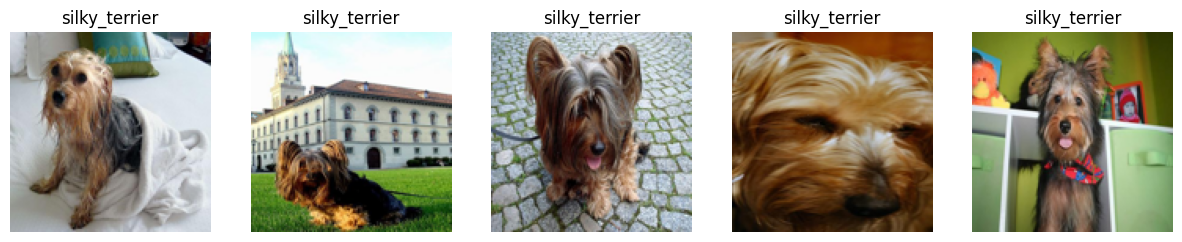

In [69]:
# Visualize a few images
def visualize_images(images, labels, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

visualize_images(images, labels, n=5)  # Visualize the first 5 images


Visaulization of images to validate shape and label

## **3. Data Reduction**

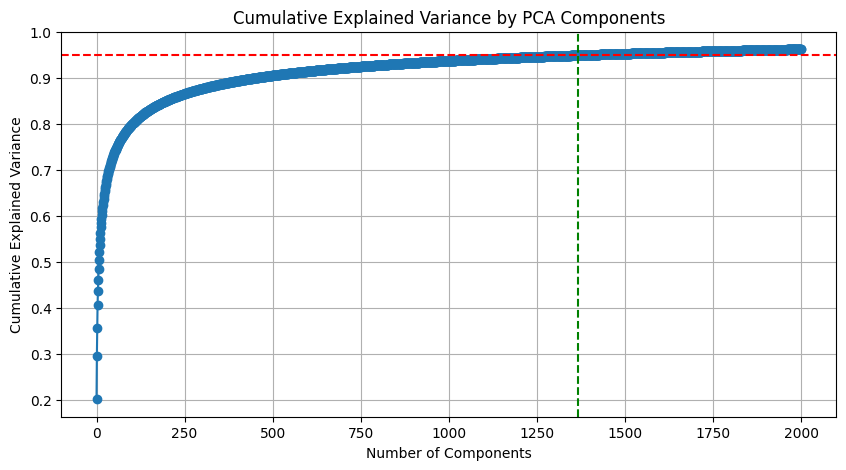

Number of components to explain 95% variance: 1366


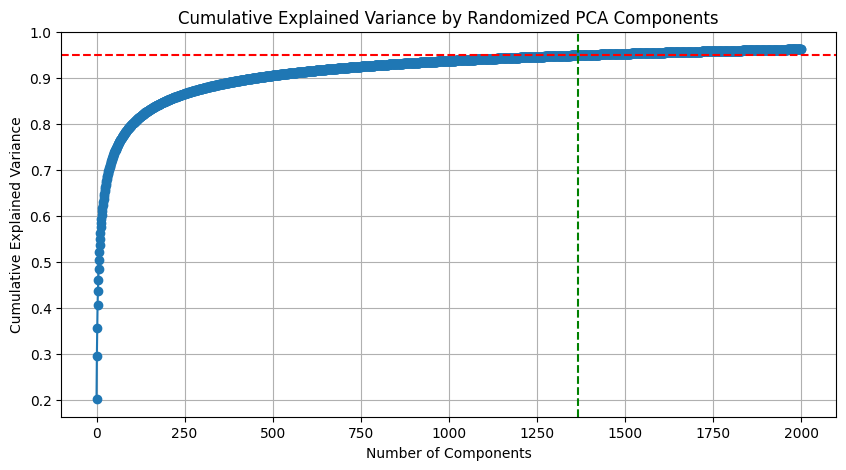

Number of components to explain 95% variance (Randomized PCA): 1366


In [19]:
# Flatten the images to create a 2D array (number of images, image features)
X = images.reshape(images.shape[0], -1)  # Reshape to (num_images, 128*128*3)

# Perform PCA
n_components = 2000  # You can adjust this number based on your analysis
pca = PCA(n_components=n_components)
pca.fit(X)

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--')  # Line for 95% variance
plt.axvline(x=np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1, color='g', linestyle='--')  # Number of components for 95%
plt.show()

# Analyze how many dimensions are required to adequately represent the image data
n_components_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f'Number of components to explain 95% variance: {n_components_95}')

# Perform Randomized PCA using the same PCA class
rpca = PCA(n_components=n_components, svd_solver='randomized', random_state=42)
rpca.fit(X)

# Plot explained variance for Randomized PCA
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(rpca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by Randomized PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--')  # Line for 95% variance
plt.axvline(x=np.argmax(np.cumsum(rpca.explained_variance_ratio_) >= 0.95) + 1, color='g', linestyle='--')  # Number of components for 95%
plt.show()

# Analyze how many dimensions are required to adequately represent the data
n_randomized_components = np.argmax(np.cumsum(rpca.explained_variance_ratio_) >= 0.95) + 1
print(f'Number of components to explain 95% variance (Randomized PCA): {n_randomized_components}')


Both standard PCA and Randomized PCA were applied to the flattened image dataset. The cumulative explained variance plots for both methods exhibited a similar trend, indicating that the majority of the variance in the dataset can be captured with a relatively small number of components. The point at which 95% of the variance is explained was approximately the same for both PCA methods. This suggests that the dimensionality reduction capabilities of both techniques are effective, allowing for simplification without significant loss of information. While both methods performed comparably in terms of variance explained, Randomized PCA is generally more efficient in high-dimensional spaces because it approximates the principal components without needing to compute the entire covariance matrix. This efficiency can be particularly beneficial for large datasets, where computational time and memory usage are concerns. The similarity in results indicates that Randomized PCA can be a viable alternative without sacrificing accuracy. In conclusion, the analysis of PCA and Randomized PCA showed that both techniques are capable of effectively reducing the dimensionality of the image feature dataset while preserving significant variance. The results indicate minimal differences in the number of components required to explain 95% of the variance, suggesting that either method can be utilized based on computational efficiency needs. For practical applications, the choice between standard PCA and Randomized PCA may depend on the dataset size and the computational resources available. Given the similar performance, Randomized PCA can be preferred for larger datasets due to its faster execution times. Future work could involve testing additional dimensionality reduction techniques or exploring how these features impact classification tasks.

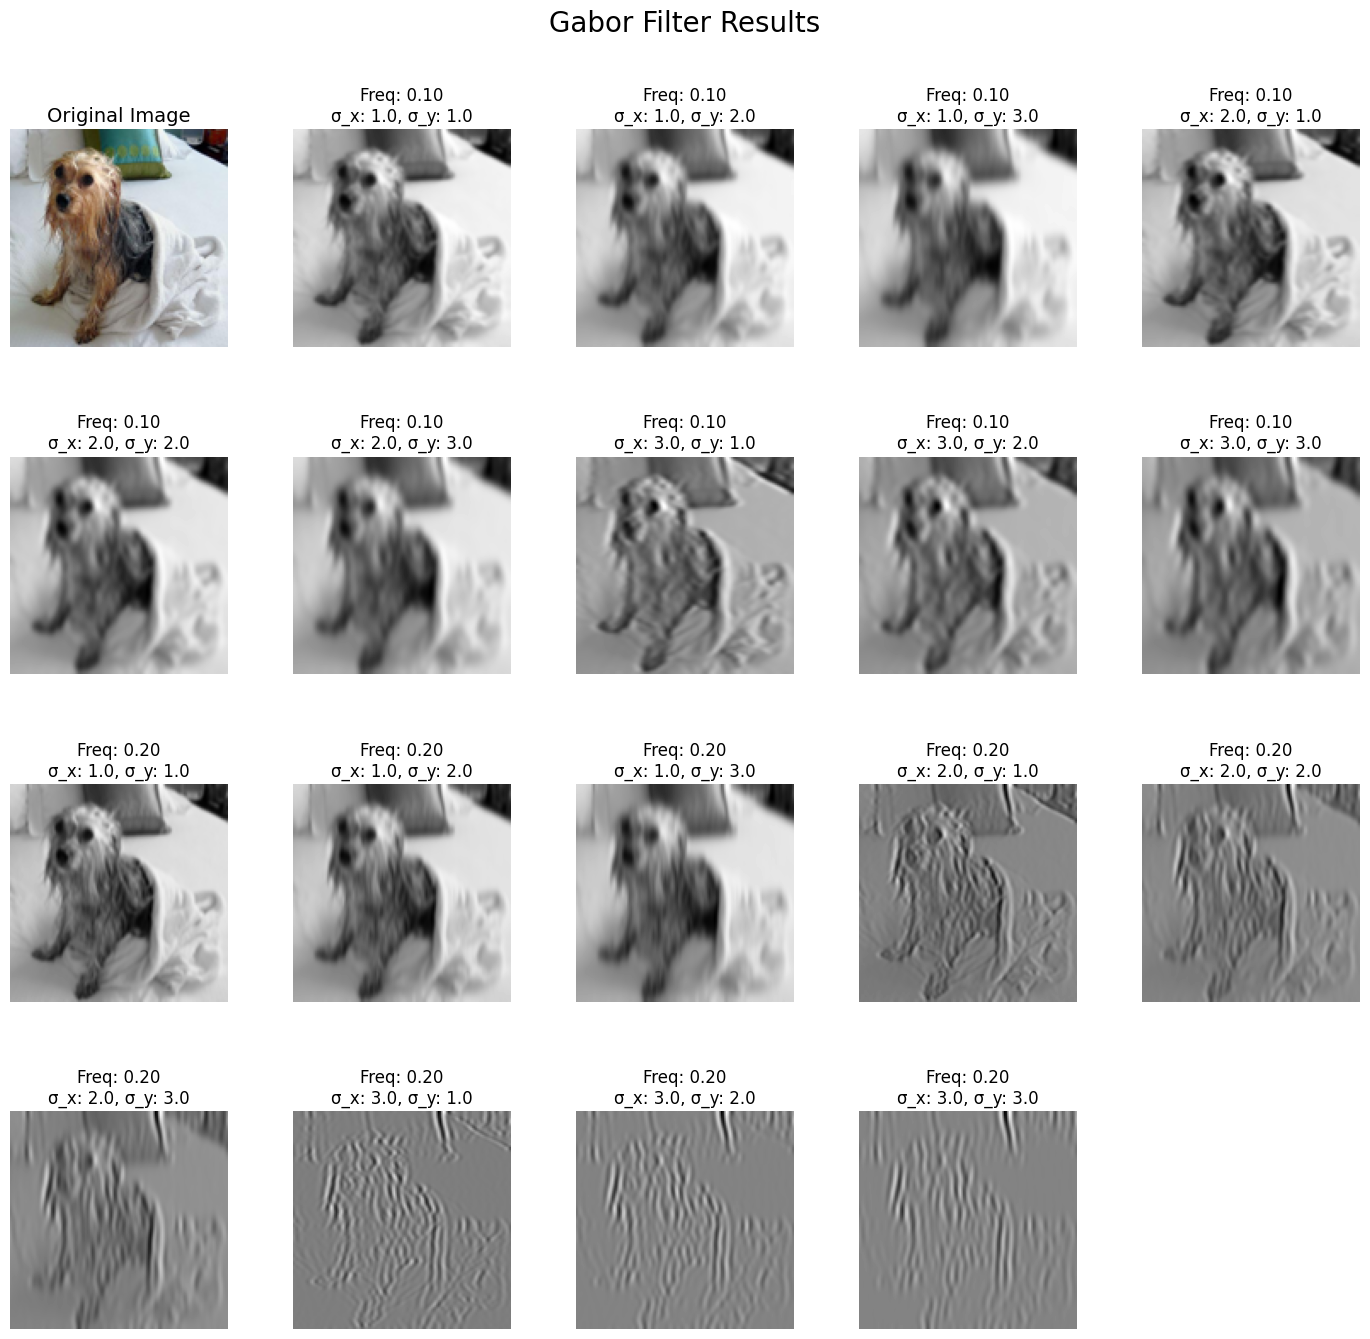

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gabor
from skimage import color

def visualize_gabor_filters(image, frequencies, sigma_x_values, sigma_y_values):
    num_freq = len(frequencies)
    num_sigma_x = len(sigma_x_values)
    num_sigma_y = len(sigma_y_values)

    # Total number of subplots: original image + Gabor-filtered images
    total_subplots = 1 + num_freq * num_sigma_x * num_sigma_y

    # Calculate the number of rows and columns for a square-like layout
    num_cols = int(np.ceil(np.sqrt(total_subplots)))
    num_rows = int(np.ceil(total_subplots / num_cols))

    # Adjust figure size to maintain a square aspect ratio
    fig_size = num_cols * 3  # Base size per subplot
    plt.figure(figsize=(fig_size, fig_size))

    # Convert to grayscale once to avoid repetition
    gray_img = color.rgb2gray(image)

    # Plot the original image
    plt.subplot(num_rows, num_cols, 1)
    plt.imshow(image)
    plt.title('Original Image', fontsize=14)
    plt.axis('off')

    # Plot Gabor-filtered images
    subplot_index = 2  # Start from the second subplot
    for i, frequency in enumerate(frequencies):
        for j, sigma_x in enumerate(sigma_x_values):
            for k, sigma_y in enumerate(sigma_y_values):
                # Apply Gabor filter
                real, _ = gabor(gray_img, frequency=frequency, sigma_x=sigma_x, sigma_y=sigma_y)

                # Display the Gabor-filtered image
                plt.subplot(num_rows, num_cols, subplot_index)
                plt.imshow(real, cmap='gray')
                plt.title(f'Freq: {frequency:.2f}\nσ_x: {sigma_x}, σ_y: {sigma_y}', fontsize=12)
                plt.axis('off')

                # Increment subplot index
                subplot_index += 1

    # Adjust layout to minimize gaps and improve readability
    plt.subplots_adjust(hspace=0.5, wspace=0.3, left=0.05, right=0.95, top=0.9, bottom=0.1)
    plt.suptitle('Gabor Filter Results', fontsize=20)  # Title for the entire figure
    plt.show()

# Example usage
example_image = images[0]

# Define fewer frequency and sigma values to reduce the number of images
frequencies = [0.1, 0.2]  # Only 2 frequencies
sigma_x_values = [1.0, 2.0, 3.0]  # Only 2 sigma x values
sigma_y_values = [1.0, 2.0, 3.0]  # Only 2 sigma y values

# Visualize Gabor filters
visualize_gabor_filters(example_image, frequencies, sigma_x_values, sigma_y_values)

The Gabor filter was applied with varying frequencies and sigma values. Specifically, we used frequencies of 0.1 and 0.2, and sigma values of 1.0, 2.0, and 3.0. This parameter selection allows us to capture a range of textures at different scales and orientations. The results of applying Gabor filters were visualized alongside the original images. This allowed us to observe how different filter settings highlight various aspects of the images, such as edges, lines, and texture patterns. By visualizing the filtered images, we can assess how well the Gabor filters differentiate between classes in our dataset. For instance, certain breeds may exhibit unique textural patterns that can be highlighted by specific filter parameters.

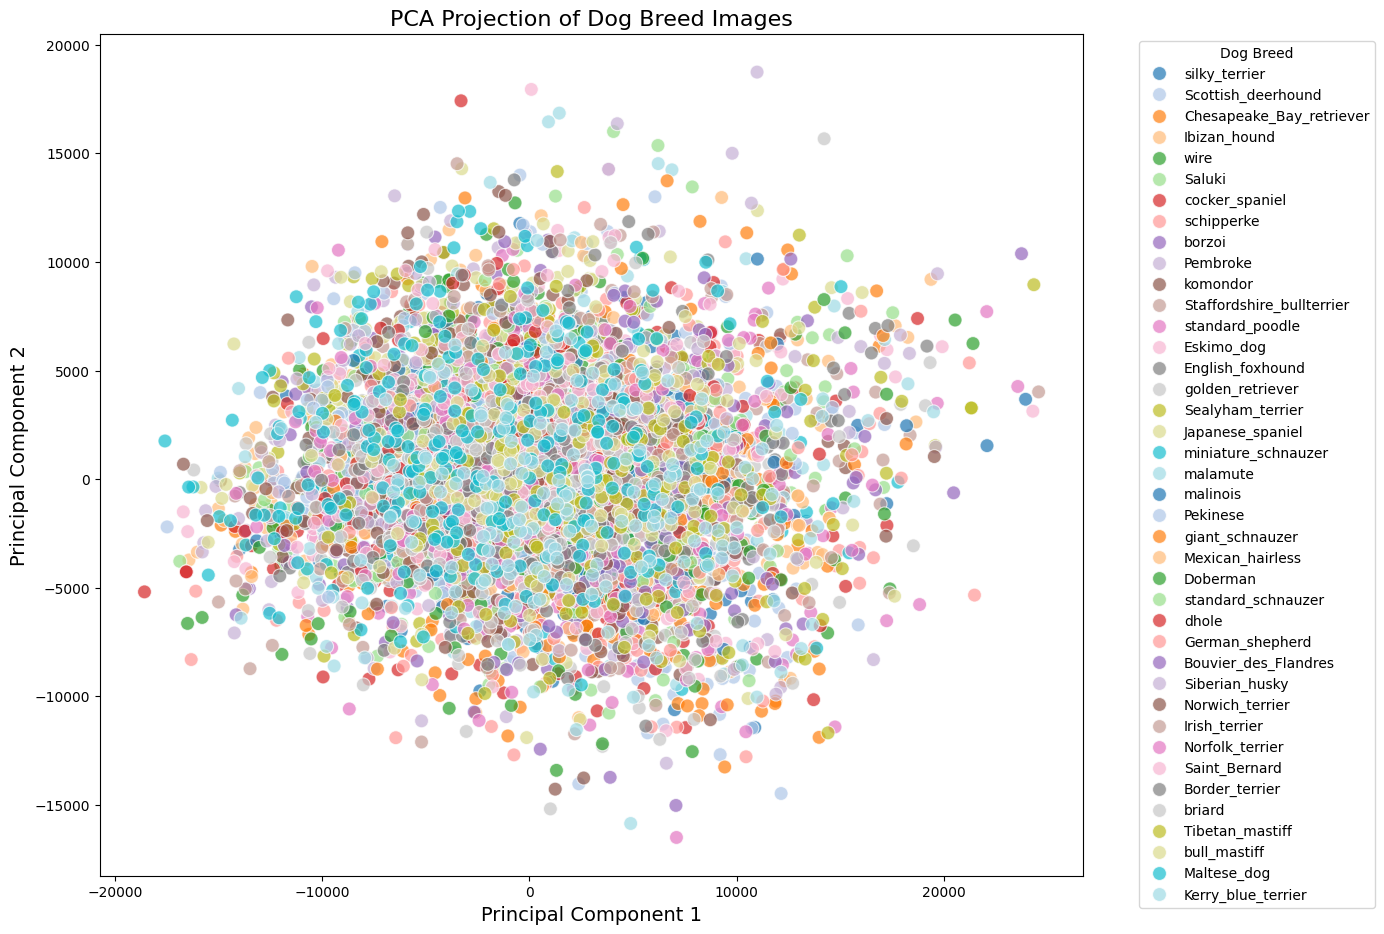

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X and labels are defined
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X)  # Fit and transform the data

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Label'] = labels  # Add labels (dog breeds)

# Limit the number of unique labels to display in the legend
unique_labels = pca_df['Label'].unique()[:40]  
filtered_df = pca_df[pca_df['Label'].isin(unique_labels)]

# Plot the PCA projection
plt.figure(figsize=(14, 10), layout='tight')
sns.scatterplot(
    data=filtered_df,
    x='PC1',
    y='PC2',
    hue='Label',  # Color by dog breed
    palette='tab20',  # Use a distinct color palette
    alpha=0.7,  # Adjust transparency
    s=100  # Increase point size
)
plt.title('PCA Projection of Dog Breed Images', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Dog Breed', fontsize=10)  # Move legend outside
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [20]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(
    pca_df,
    x='PC1',
    y='PC2',
    color='Label',  # Color by dog breed
    title='PCA Projection of Dog Breed Images',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
    hover_name='Label',  # Show breed name on hover
    width=1000,  # Adjust width
    height=800  # Adjust height
)

# Update layout for better readability
fig.update_layout(
    legend_title_text='Dog Breed',
    legend=dict(x=1.05, y=1),  # Move legend outside
    font=dict(size=12)
)



# Show the plot
fig.show()

The interactive scatter plot created using plotly.express provides a visual representation of the PCA (Principal Component Analysis) projection of dog breed images. The x-axis (PC1) represents the first principal component, which captures the most variance in the data, while the y-axis (PC2) represents the second principal component, which captures the second most variance. Each point on the plot corresponds to an image of a dog breed, with its color indicating the breed as specified in the Label column of pca_df. The plot is interactive, allowing users to hover over points to display the breed name, zoom in and out, and pan to explore specific regions.

From the visualization, several key observations can be made. If points of the same breed form tight clusters, it suggests that the features used for PCA, such as Gabor features or pixel values, effectively differentiate that breed from others. Conversely, if different breeds overlap or are positioned close together, it indicates that the selected features may not be sufficient to distinguish them, possibly due to visual similarities like coat color, shape, or texture. Well-separated breeds suggest that the features used for PCA are highly discriminative, while overlapping breeds may require additional features or more sophisticated modeling techniques to improve classification.

The spread of data along PC1 and PC2 provides insight into variance distribution. A wide spread along PC1 suggests that it captures a significant amount of variance, while a lesser spread along PC2 indicates that it captures comparatively less variance. If the PCA plot shows clear separation between breeds, it suggests that the feature extraction method is effective. However, significant overlap between breeds implies that additional features or advanced techniques, such as deep learning, may be needed. Breeds positioned close together in the plot likely share similar visual characteristics, while those farther apart have distinct visual features. Additionally, outliers—points that are distant from their respective clusters—may represent images with unusual characteristics, such as atypical poses, lighting conditions, or backgrounds, or could be the result of mislabeled data.

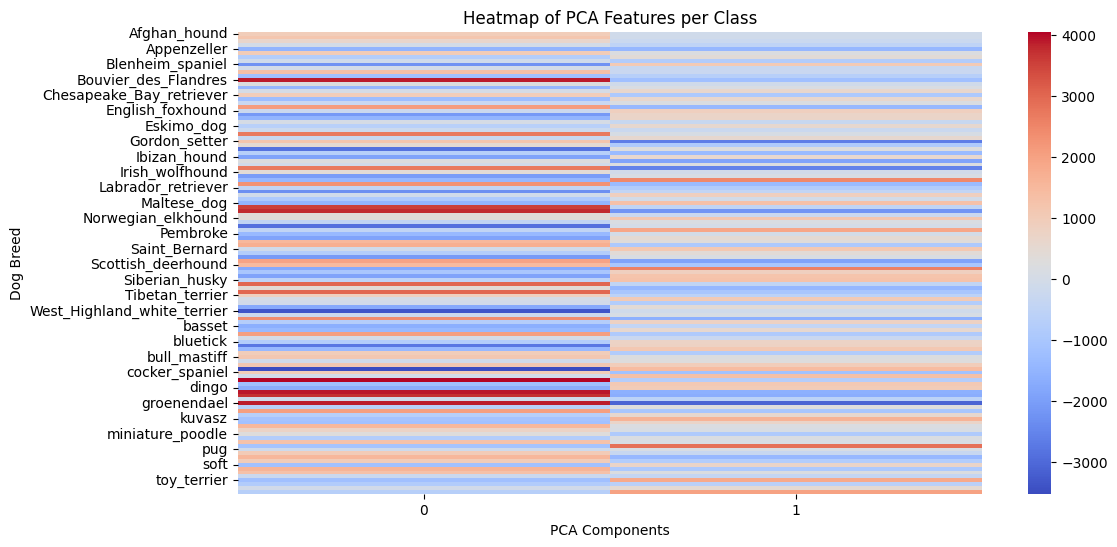

In [28]:
# Compute mean PCA feature values for each class
pca_means = pd.DataFrame(X_pca[:, :10]).groupby(labels).mean()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pca_means, cmap='coolwarm', annot=False)
plt.title("Heatmap of PCA Features per Class")
plt.xlabel("PCA Components")
plt.ylabel("Dog Breed")
plt.show()


The heatmap presents a visually striking representation of the mean PCA feature values for various dog breeds. Each row corresponds to a different breed, while the columns represent the first ten PCA components. The color gradient, ranging from cool blue to warm red, effectively highlights the variation in feature values. Breeds that exhibit higher mean values for specific PCA components are shown in shades of red, suggesting distinctive characteristics in those dimensions. Conversely, breeds with lower mean values appear in cooler blue tones, indicating less prominence in those features. Notably, certain breeds cluster together, indicating potential similarities in their PCA representations, while others stand out with unique profiles. This visualization not only simplifies the comparison of different breeds across multiple dimensions but also aids in identifying patterns and relationships that may exist within the data. Overall, the heatmap serves as an effective tool for understanding the underlying structure of the dataset, revealing how different breeds express themselves across the principal components derived from PCA.

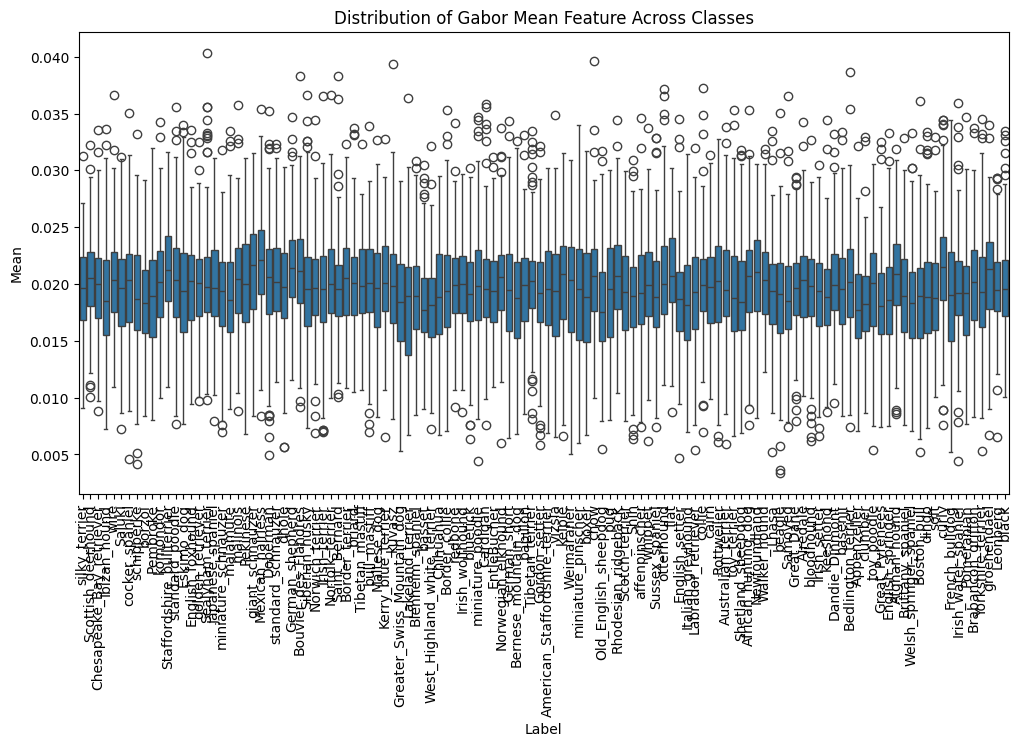

In [29]:
gabor_features = []

# Extract statistics from Gabor-filtered images
for image, label in zip(images, labels):
    gray_img = color.rgb2gray(image)
    real, _ = gabor(gray_img, frequency=0.2, sigma_x=2, sigma_y=2)  # Example filter
    gabor_features.append([real.mean(), real.var(), label])

# Convert to DataFrame
gabor_df = pd.DataFrame(gabor_features, columns=['Mean', 'Variance', 'Label'])

# Plot feature distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=gabor_df, x='Label', y='Mean')
plt.xticks(rotation=90)
plt.title("Distribution of Gabor Mean Feature Across Classes")
plt.show()


The boxplot visualizes the distribution of the mean Gabor feature extracted from Gabor-filtered images across different classes (dog breeds). Each box represents a breed, showcasing the range of mean values derived from the Gabor filter applied to the images. The y-axis indicates the mean feature values, while the x-axis lists the dog breeds, with labels rotated for better readability. Each box captures the interquartile range (IQR), providing insights into the variability and central tendency of the mean values for each breed. The line within each box denotes the median, while the "whiskers" extend to show the range of values, with potential outliers marked individually. From the plot, distinct differences in mean Gabor feature values can be observed across the breeds, indicating varying texture characteristics captured by the Gabor filter. Some breeds display wider distributions, suggesting greater variability in texture features, while others are more tightly clustered around their mean values. This boxplot serves as an effective tool for comparing texture characteristics among dog breeds, allowing for a clearer understanding of how Gabor features contribute to the classification of images based on visual texture.